In [107]:
from collections import Counter, defaultdict
import pickle
import math

from matplotlib import pyplot as plt

In [28]:

def process_line(line, char_counter, couple_counter):
    previous_char = None
    for char in line:
        if 0x4e00 <= ord(char) <= 0x9fff:
            char_counter[char] += 1
            if previous_char:
                couple_counter[(previous_char, char)] += 1

            previous_char = char
        else:
            previous_char = None


In [29]:
char_counter = Counter()
couple_counter = Counter()

In [30]:
with open('zhwiki-latest-pages-articles.xml', 'r') as file:
    for i, line in enumerate(file):
        process_line(line, char_counter, couple_counter)

        if i % 1000000 == 0:
            print('{} / 177292781'.format(i))

0 / 177292781
1000000 / 177292781
2000000 / 177292781
3000000 / 177292781
4000000 / 177292781
5000000 / 177292781
6000000 / 177292781
7000000 / 177292781
8000000 / 177292781
9000000 / 177292781
10000000 / 177292781
11000000 / 177292781
12000000 / 177292781
13000000 / 177292781
14000000 / 177292781
15000000 / 177292781
16000000 / 177292781
17000000 / 177292781
18000000 / 177292781
19000000 / 177292781
20000000 / 177292781
21000000 / 177292781
22000000 / 177292781
23000000 / 177292781
24000000 / 177292781
25000000 / 177292781
26000000 / 177292781
27000000 / 177292781
28000000 / 177292781
29000000 / 177292781
30000000 / 177292781
31000000 / 177292781
32000000 / 177292781
33000000 / 177292781
34000000 / 177292781
35000000 / 177292781
36000000 / 177292781
37000000 / 177292781
38000000 / 177292781
39000000 / 177292781
40000000 / 177292781
41000000 / 177292781
42000000 / 177292781
43000000 / 177292781
44000000 / 177292781
45000000 / 177292781
46000000 / 177292781
47000000 / 177292781
48000000

In [32]:
couple_counter = couples_counter

In [34]:
#with open('char_counter.pickle', 'wb') as f:
#    pickle.dump(char_counter, f)
#with open('couple_counter.pickle', 'wb') as f:
#    pickle.dump(couple_counter, f)


In [ ]:
with open('char_counter.pickle', 'rb') as f:
    char_counter = pickle.load(f)
with open('couple_counter.pickle', 'rb') as f:
    couple_counter = pickle.dump(f)


# Basic stats

In [35]:
nb_unique_char = len(char_counter)
nb_unique_couple = len(couple_counter)

print('{} unique chars'.format(nb_unique_char))
print('{} unique couples'.format(nb_unique_couple))
print('Matrix is {} full'.format(nb_unique_couple/(nb_unique_char**2)))


20985 unique chars
7214055 unique couples
Matrix is 0.0163817955675818 full


In [44]:
char_occ_list = [occ for c, occ in char_counter.items()]
couple_occ_list = [occ for c, occ in couple_counter.items()]

nb_char = sum(char_occ_list)
nb_couple = sum(couple_occ_list)

print('{} chars vs {} couples ({})'.format(nb_char, nb_couple, nb_couple/nb_char))

1067752375 chars vs 831280758 couples (0.7785332793101959)


# Normalize

In [65]:
char_proba_sorted = {
    char: occ/nb_char
    for char, occ in sorted(char_counter.items(), key=lambda item: -item[1])
}

couple_proba_sorted = {
    couple: occ/nb_couple
    for couple, occ in sorted(couple_counter.items(), key=lambda item: -item[1])
}

In [66]:
char_proba_sorted

{'的': 0.01926116905148537,
 '年': 0.016256375922366832,
 '日': 0.009081366829083382,
 '月': 0.008210286584471423,
 '中': 0.008194716495011307,
 '人': 0.007882092512320565,
 '一': 0.006718806876922189,
 '大': 0.006502521710616659,
 '在': 0.0055920381352464795,
 '国': 0.004953922954280481,
 '是': 0.004943715531421787,
 '國': 0.00454533852008524,
 '有': 0.00432956564484345,
 '行': 0.003961411933174112,
 '斯': 0.003943724311547422,
 '地': 0.0037664865882410235,
 '和': 0.0037171315118826125,
 '文': 0.0036523056200179374,
 '第': 0.00342087368337626,
 '名': 0.0034114941678308136,
 '公': 0.003411473563802656,
 '部': 0.0032464015825766717,
 '為': 0.003154015929957543,
 '市': 0.0031174915438610005,
 '不': 0.0030665789902832104,
 '小': 0.003032000748300841,
 '上': 0.002990919125794499,
 '以': 0.0029558969606600033,
 '出': 0.002917733617778186,
 '定': 0.00290703263479044,
 '重': 0.0029031366003751573,
 '新': 0.0028751816168987683,
 '本': 0.0028719833098006455,
 '成': 0.0028077455692852005,
 '西': 0.002789729219754721,
 '作': 0.0027

In [70]:
couple_proba_sorted

{('定', '向'): 0.002077657859127301,
 ('重', '定'): 0.002070077989222505,
 ('中', '国'): 0.0017779239875055546,
 ('香', '港'): 0.001242400945842656,
 ('日', '本'): 0.0012400635887207677,
 ('行', '星'): 0.0011889003690856513,
 ('小', '行'): 0.001148087443159607,
 ('公', '司'): 0.0010316117530053547,
 ('人', '民'): 0.0010297387396040268,
 ('足', '球'): 0.0009724139434489352,
 ('使', '用'): 0.0009560031221124452,
 ('電', '視'): 0.0009226425520124934,
 ('行', '政'): 0.0008827282394524041,
 ('世', '界'): 0.0008826428290789331,
 ('研', '究'): 0.0008293190878839036,
 ('第', '一'): 0.0008086317330588326,
 ('人', '口'): 0.0008082299434146171,
 ('来', '源'): 0.0008056616173954552,
 ('的', '一'): 0.0008031414098965587,
 ('政', '府'): 0.0007559551859613716,
 ('美', '國'): 0.0007441096092350546,
 ('参', '考'): 0.0007382596001337974,
 ('一', '个'): 0.000735384518547944,
 ('列', '表'): 0.0007216142010110139,
 ('台', '灣'): 0.0006925217436585967,
 ('留', '言'): 0.0006908063184111378,
 ('作', '品'): 0.0006907870710030317,
 ('个', '来'): 0.000684043260387846

In [75]:
char_proba_list_sorted = [occ for c, occ in char_proba_sorted.items()]
couple_proba_list_sorted = [occ for c, occ in couple_proba_sorted.items()]


In [82]:
char_log10proba_list_sorted = [math.log10(p) for p in char_proba_list_sorted]
couple_log10proba_list_sorted = [math.log10(p) for p in couple_proba_list_sorted]


# Occurrence graphs

In [54]:
plt.rcParams['figure.figsize'] = [12, 8]

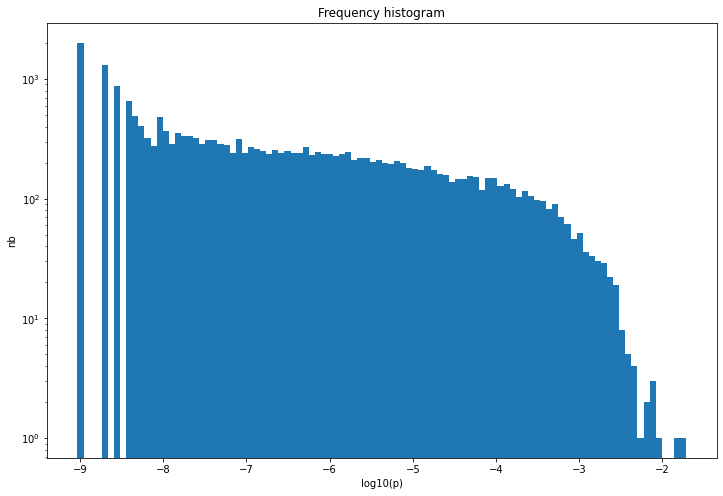

In [92]:
plt.title('Frequency histogram')
plt.xlabel('log10(p)')
plt.ylabel('nb')
_ = plt.hist(char_log10proba_list_sorted, log=True, bins=100)


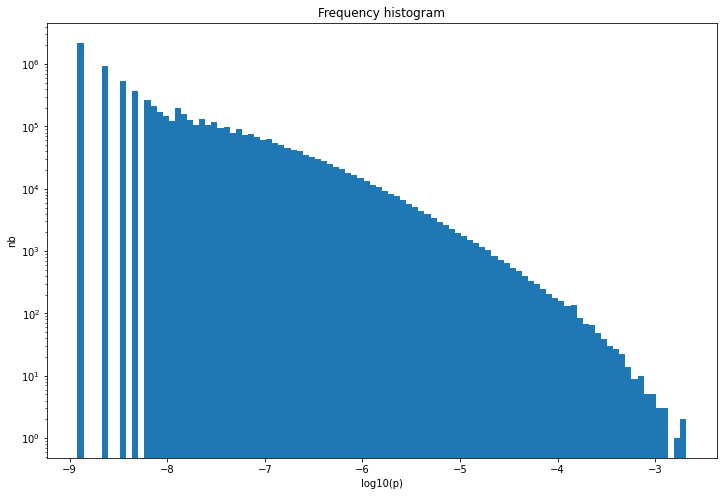

In [93]:
plt.title('Frequency histogram')
plt.xlabel('log10(p)')
plt.ylabel('nb')
_ = plt.hist(couple_log10proba_list_sorted, log=True, bins=100)


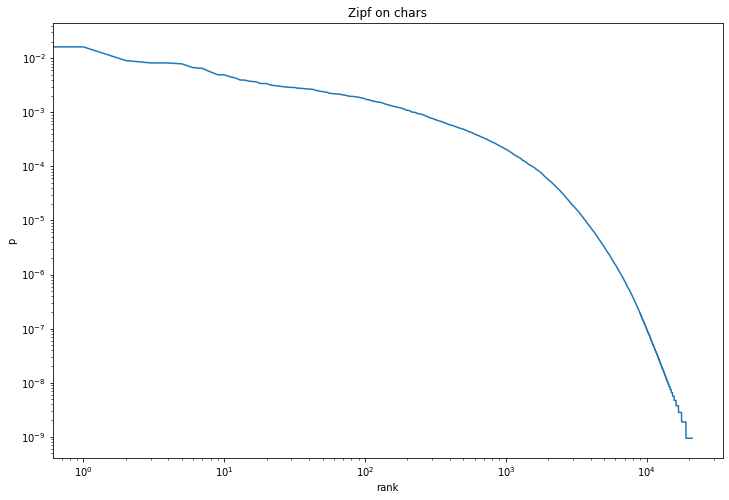

In [95]:
plt.title('Zipf on chars')
plt.xlabel('rank')
plt.ylabel('p')
_ = plt.loglog(char_proba_list_sorted)


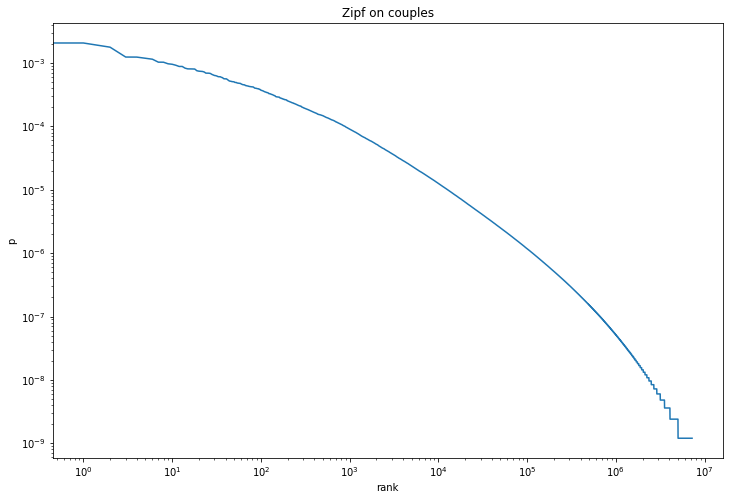

In [96]:
plt.title('Zipf on couples')
plt.xlabel('rank')
plt.ylabel('p')
_ = plt.loglog(couple_proba_list_sorted)


# Deviation from independance

In [120]:
dependance_dict = {
    couple: p_couple / (char_proba_sorted[couple[0]] * char_proba_sorted[couple[1]])
    for couple, p_couple in couple_proba_sorted.items()
}

In [99]:
dependance = [
    p_couple / (char_proba_sorted[couple[0]] * char_proba_sorted[couple[1]])
    for couple, p_couple in couple_proba_sorted.items()
]

In [105]:
dependance_log10 = [math.log10(dep) for dep in dependance]

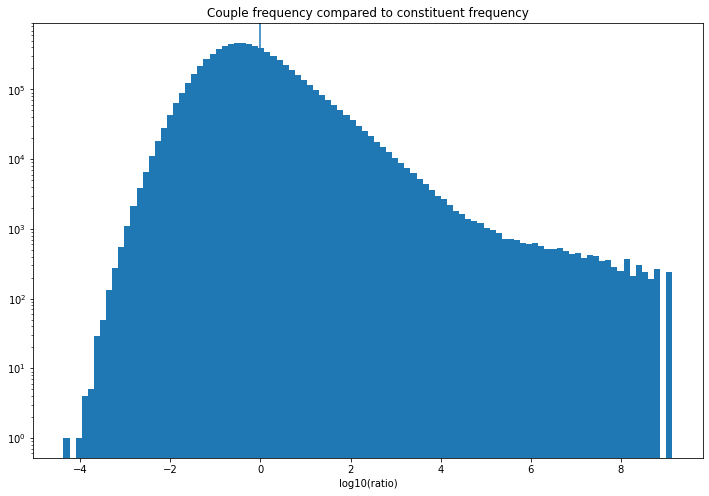

In [106]:
plt.title('Couple frequency compared to constituent frequency')
plt.xlabel('log10(ratio)')
_ = plt.hist(dependance_log10, log=True, bins=100)
_ = plt.axvline(x=0.0)

# Detect 2-char words

In [109]:
word_couple_set = defaultdict(set)

for couple, couple_proba in couple_proba_sorted.items():
    char1, char2 = couple
    word_couple_set[char1].add(couple)
    word_couple_set[char2].add(couple)


In [164]:
use_fraction = {
    couple: (couple_counter[couple]/char_counter[couple[0]], couple_counter[couple]/char_counter[couple[1]])
    for couple in couple_proba_sorted.keys()
}

In [165]:
use_fraction[('屳', '定')]

(0.4, 6.443317651372056e-07)

In [172]:
use_fraction[('决', '定')]

(0.29158977303277606, 0.02061603915733003)

In [168]:
min_use_fraction = [
    min(pair)
    for pair in use_fraction.values()
]


In [174]:
min_use_fraction_log10 = [
    math.log10(fraction)
    for fraction in min_use_fraction
]


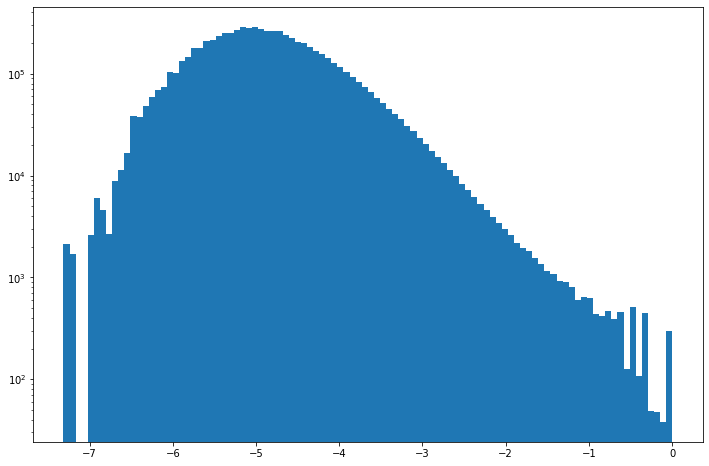

In [175]:
_ = plt.hist(min_use_fraction_log10, bins=100, log=True)

In [218]:
words = [
    couple
    for couple in couple_proba_sorted.keys()
    if (
        min(use_fraction[couple]) >= 0.01 and 
        dependance_dict[couple] >= 5 and
        couple_proba_sorted[couple] >= 0.000001
    )
]
len(words), len(couple_proba_sorted)

(10987, 7214055)

In [219]:
word_set = set(words)
word_ranks = {
    word: rank
    for rank, word in enumerate(words)
}

In [228]:
with open('words.txt', 'w') as f:
    f.write('word\tlog10(p)\trank\n')
    for rank, word in enumerate(words):
        f.write('{}\t{:10.4f}\t{}\n'.format(
            ''.join(word),
            math.log10(couple_proba_sorted[word]),
            word_ranks[word]
        ))

# Generate vocabulary list by char

In [156]:
def study_char(char):
    given_char_couples = sorted(word_couple_set[char], key=lambda couple: -couple_proba_sorted[couple])
    given_char_dependance = [
        dependance_dict[couple]
        for couple in given_char_couples
    ]
    given_char_couple_proba = [
        couple_proba_sorted[couple]
        for couple in given_char_couples
    ]
    given_char_fraction = [
        couple_counter[couple] / char_counter[char]
        for couple in given_char_couples
    ]
    return sorted(
        zip(given_char_couples, given_char_dependance, given_char_couple_proba, given_char_fraction),
        key=lambda item: -item[1],
    )

定_zip = study_char('定')
定_zip

定_dependance = list(zip(*定_zip))[1]
_ = plt.hist([math.log10(ratio) for ratio in 定_dependance], bins=100)

定_fraction = list(zip(*定_zip))[3]
_ = plt.hist([math.log10(fraction) for fraction in 定_fraction], bins=100, log=True)

In [221]:
interesting_chars = sorted(
    set([
        char
        for char, p in char_proba_sorted.items()
        if p >= 0.000001
    ] + [
        char
        for word in words
        for char in word
    ]),
    key = lambda char: -char_proba_sorted[char],
)

In [222]:
len(interesting_chars)

6585

In [229]:
with open('words_by_char.txt', 'w') as f:
    for char in interesting_chars:
        f.write('word\tlog10(p)\trank\tdependance\tuse fraction\tother use fraction\n')
        f.write('{}\t{:10.4f}\n'.format(
            char,
            math.log10(char_proba_sorted[char]),
        ))

        given_char_couples = sorted(
            word_couple_set[char],
            key=lambda couple: -couple_proba_sorted[couple],
        )

        for couple in given_char_couples:
            given_couple_proba = couple_proba_sorted[couple]
            given_couple_dependance = dependance_dict[couple]
            given_couple_use_fraction = use_fraction[couple]
            given_couple_char_use_fraction = couple_counter[couple]/char_counter[char]
            other_chars = set(couple) - set([char])
            other_char = list(other_chars)[0] if other_chars else char
            given_couple_other_char_use_fraction = couple_counter[couple]/char_counter[other_char]

            if couple in word_set:
                f.write('{}\t{:10.4f}\t{}\t{:10.4f}\t{:10.4f}\t{:10.4f}\n'.format(
                    ''.join(couple),
                    math.log10(couple_proba_sorted[couple]),
                    word_ranks[couple],
                    given_couple_dependance,
                    given_couple_char_use_fraction,
                    given_couple_other_char_use_fraction,
                ))

        f.write('\n')